In [1]:
# Load in the data wrangling Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load data
#----------
bank = pd.read_csv('./../data/input/bank-additional-full.csv', sep=';')

# Explore the top of the dataset
#------------------------------
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check for null values and the datatypes
#----------------------------------------
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Double check for null values
#-----------------------------
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
# How many rows and columns does the dataset have
#------------------------------------------------
bank.shape

(41188, 21)

In [6]:
# Quick statistical run down of the numerical columns
#----------------------------------------------------
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#  Replace columns names that have periods (.) with an underscore (_)
new_column_names = bank.columns

bank.columns = new_column_names.str.replace('.','_')

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


More specifically, we'll look at the following topics.

Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) - the process of going through a dataset and finding out more about it.

Model Building

Model training - create model(s) to learn to predict a target variable based on other variables.
Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
Model comparison - comparing several different models to find the best one.
Model fine-tuning - once we've found a good model, how can we improve it?
Feature importance - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
Cross-validation - if we do build a good model, can we be sure it will work on unseen data?
Reporting what we've found - if we had to present our work, what would we show someone?

To work through our analysis, we'll use pandas, Matplotlib and NumPy for data anaylsis, then well use, Scikit-Learn for machine learning and modelling tasks.

## Distribution of the Target

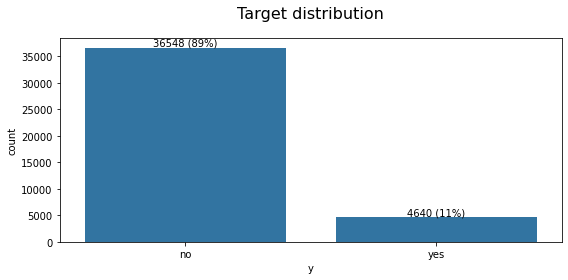

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=bank['y'], ax=ax)

abs_vals = bank['y'].value_counts()
rel_vals = bank['y'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Target distribution', fontsize=16, pad=20)

plt.tight_layout();

There are more no's then yes's in this dataset, which is probably what is expected in the bank marketing subscriber environment. This is also the case of an imbalanced dataset and care must be taken into consideration when looking at accruacy, precision and recall.

## Conclusion:

Our target variable is highly imbalanced.

## Lets look at the age distribution of those that were subscribed the loan and those that were not.

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


"\nplt.figure(figsize = (10, 12))\nplt.style.use('default')\ng = sns.displot(data=bank, x='age', hue='y', bins=30, kde = False, legend=False)\n\nplt.title('Age Distribution')\nplt.xlabel('Age')\n\nplt.legend(title='Subscribed Term', loc='upper right', labels=['yes', 'no'])\nplt.show()\n"

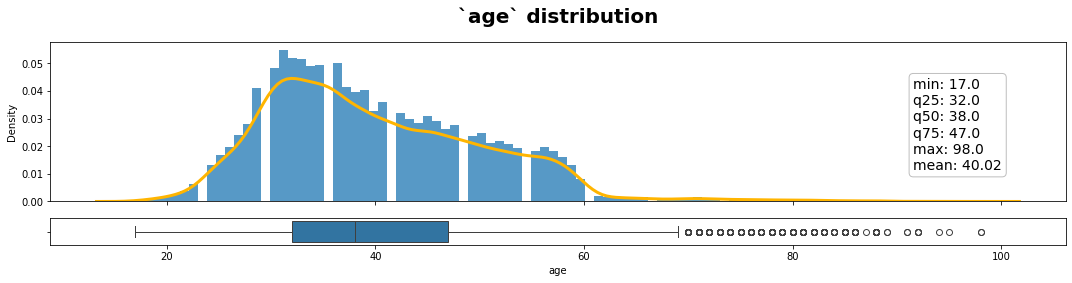

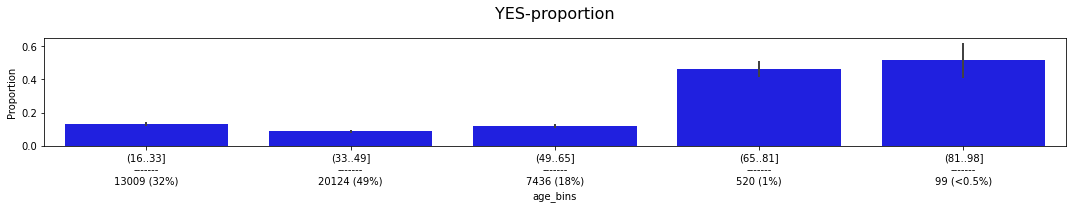

In [9]:
bank['y'].replace({'no': 0, 'yes': 1}, inplace=True);
%run custom_functions.ipynb
analyse_feature(df_=bank, feature_name='age', feature_type='numeric', num_gr=5)
'''
plt.figure(figsize = (10, 12))
plt.style.use('default')
g = sns.displot(data=bank, x='age', hue='y', bins=30, kde = False, legend=False)

plt.title('Age Distribution')
plt.xlabel('Age')

plt.legend(title='Subscribed Term', loc='upper right', labels=['yes', 'no'])
plt.show()
'''

In [10]:
feature_name = 'age'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (age vs y): 0.0304


# Feature: job (categorical)

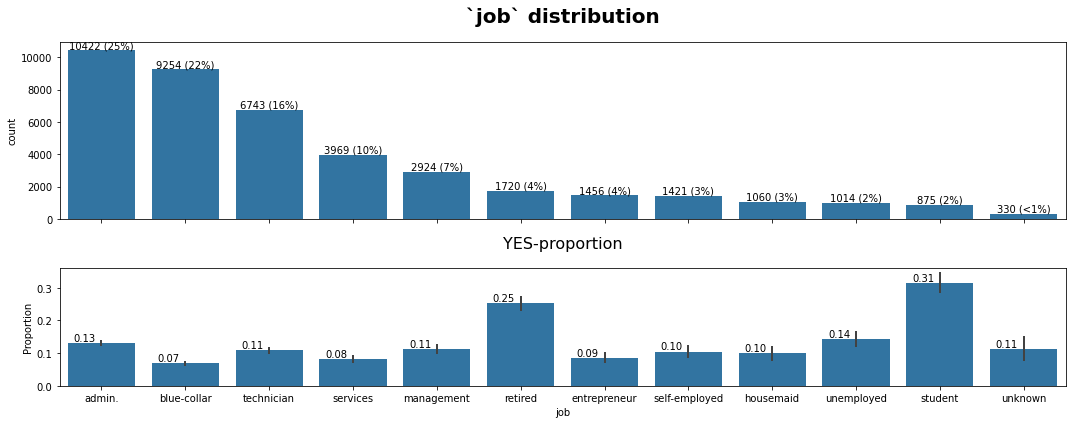

In [11]:
analyse_feature(df_=bank, feature_name='job', feature_type='categorical')


job

Conclusions:

Most of the people in the dataset are from working class (admin + blue-collar + technician + services  ≈
  73%).
There is no substantial evidence of relationships between job's categories and YES-answers.

# Feature: marital (categorical)

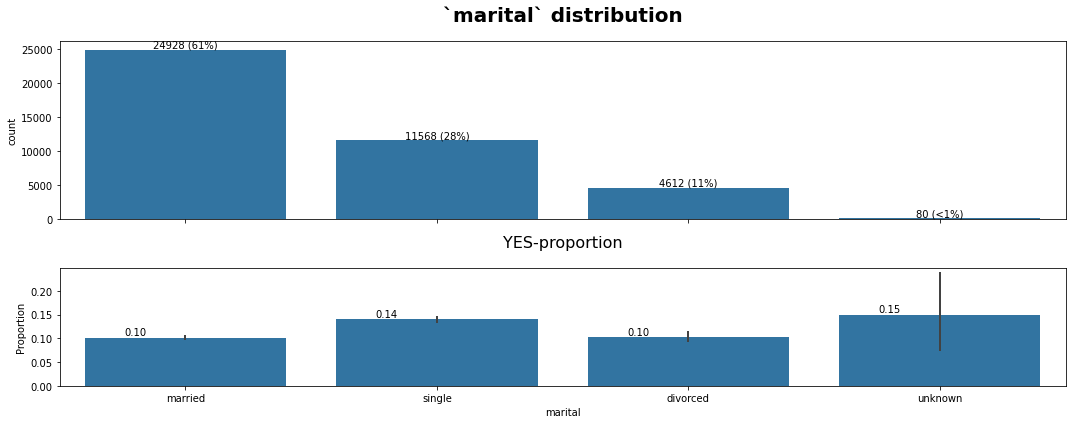

In [12]:
analyse_feature(df_=bank, feature_name='marital', feature_type='categorical')

marital

Conclusions:

Most people in the dataset are married ( ≈
 61%).
There is no substantial evidence of relationships between marital's categories and YES-answers.

# Feature: education (categorical)

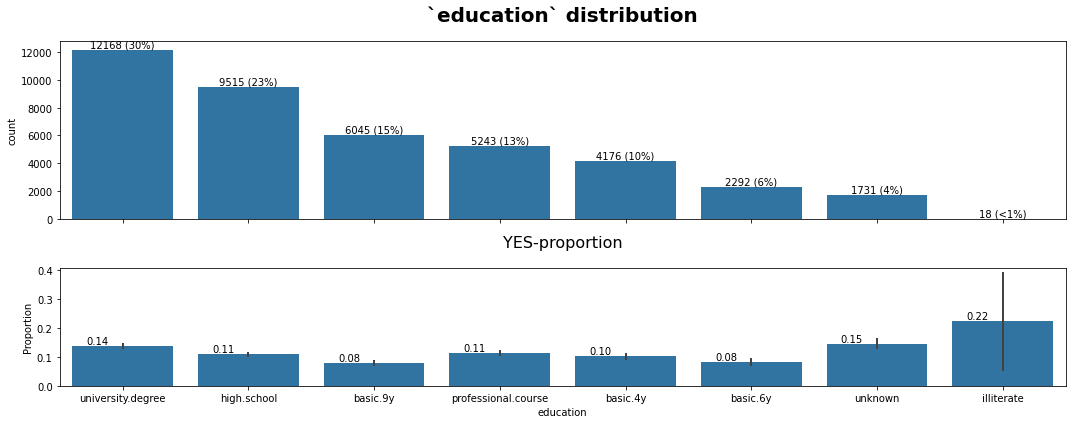

In [13]:
analyse_feature(df_=bank, feature_name='education', feature_type='categorical')

education

Conclusion:

There is no substantial evidence of relationships between education's categories and YES-answers.

# Feature: default (categorical)

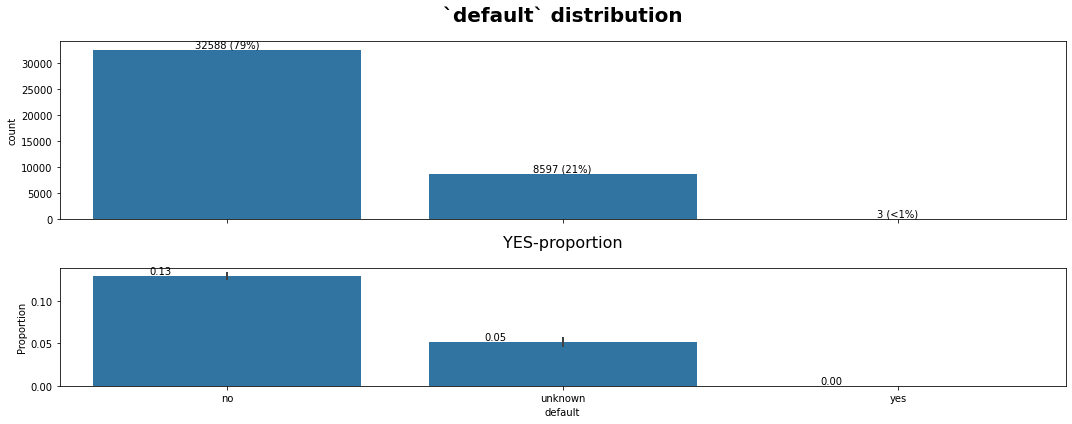

In [14]:
analyse_feature(df_=bank, feature_name='default', feature_type='categorical')

default

Conclusion:

Most people in the dataset ( ≈ 79%) have NO credit in default.
It seems like people with NO credit in default are more likely to agree to subscribe a bank term deposit

# Feature: housing (categorical)

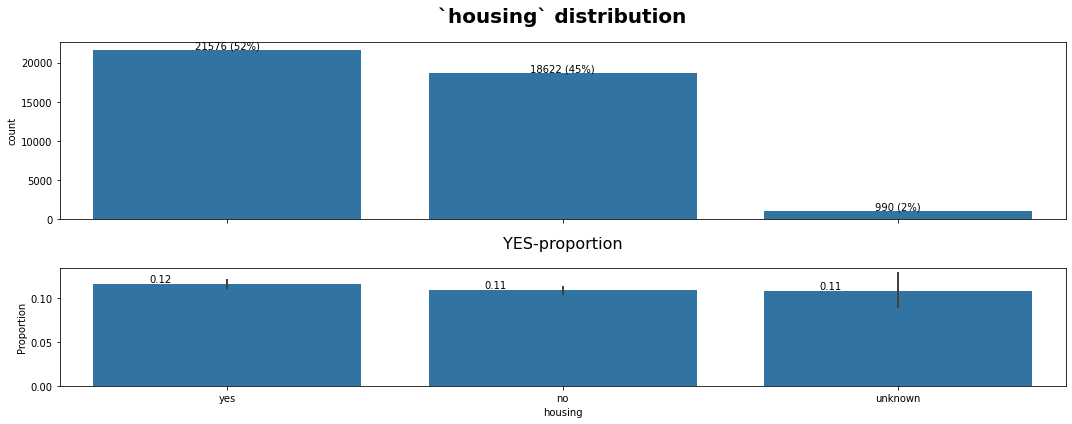

In [15]:
analyse_feature(df_=bank, feature_name='housing', feature_type='categorical')

housing

Conclusion:

The number of people who have a housing loan is almost equal to the number of people who haven't (52% vs 45%).
There is no substantial evidence of relationships between housing's categories and YES-answers.

# Feature: loan (categorical)

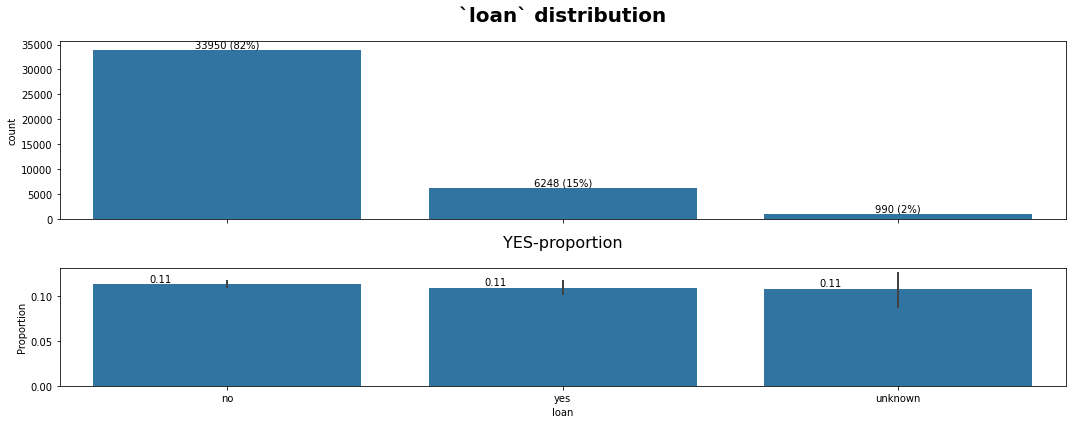

In [16]:
analyse_feature(df_=bank, feature_name='loan', feature_type='categorical')

loan

Conclusion:

The overwhelming majority of people don't have a personal loan ( ≈ 82%)
There is no substantial evidence of relationships between loan's categories and YES-answers.

# Feature: contact (categorical)
Related with the last contact of the current campaign

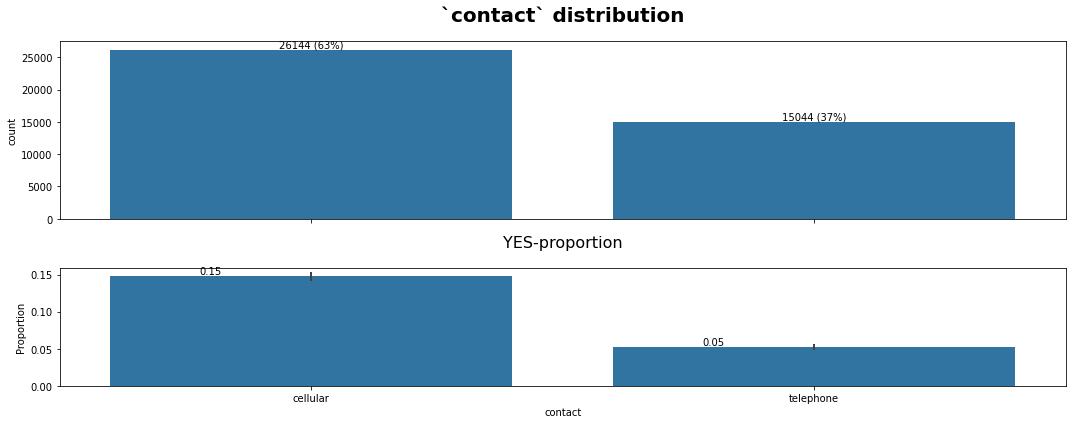

In [17]:
analyse_feature(df_=bank, feature_name='contact', feature_type='categorical')

contact

Conclusion:

Most people were contacted by the cellular ( ≈ 63%)
People which were contacted via cellular are a bit likely to agree to subscribe a bank term deposit.

# Feature: duration (numeric)
duration: last contact duration, in seconds (numeric).

Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


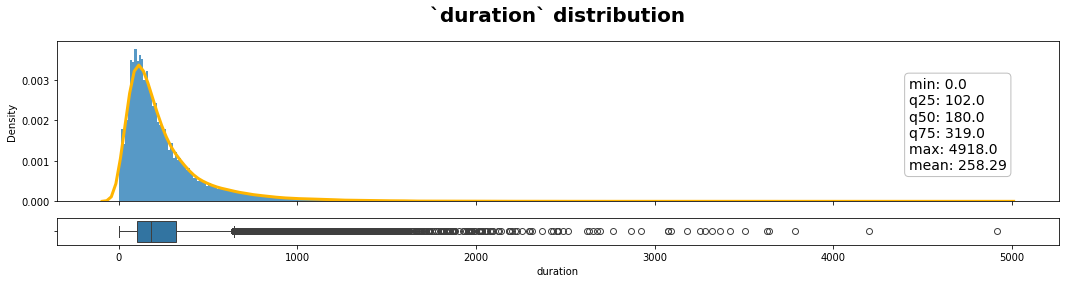

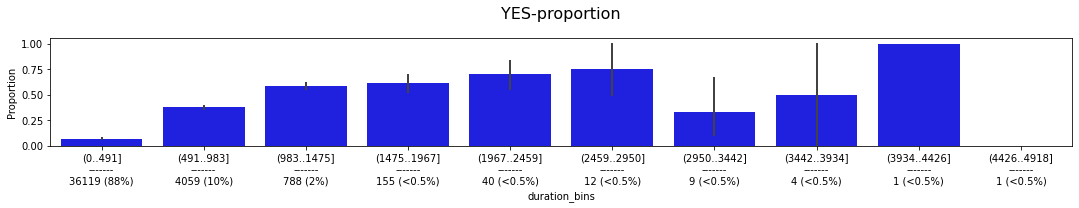

In [18]:
analyse_feature(df_=bank, feature_name='duration', feature_type='numeric')

In [19]:
feature_name = 'duration'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (duration vs y): 0.4053


There is a correlation between duration and y.

duration

Conclusion:

If we consider only first 3-4 groups (with enough number of observations), it's pretty obvious that the longer the call is the higher chances are to get a positive decision (and the common sense says the same).
And we also shouldn't forget about the important note, that says: "this attribute highly affects the output target (e.g., if duration=0 then y='no')".

# Feature: campaign (numeric)

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


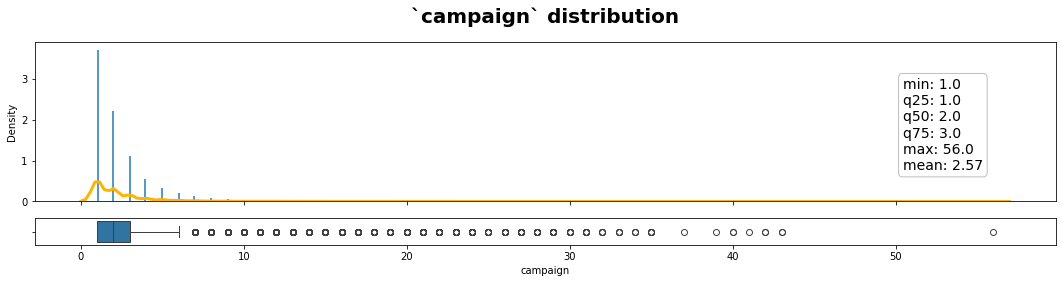

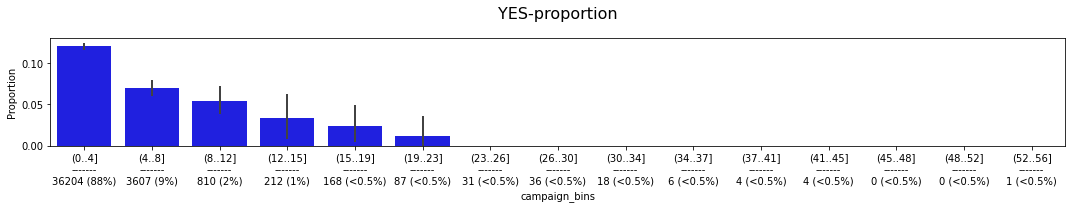

In [20]:
analyse_feature(df_=bank, feature_name='campaign', feature_type='numeric', num_gr=15)

In [21]:
feature_name = 'campaign'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (campaign vs y): -0.0664


There is no correlation between campaign and y.

campaign

Conclusion:

Nearly 43% were contacted only once.
88% of people were contacted less than 5 times.

# Feature: pdays (numeric)
pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


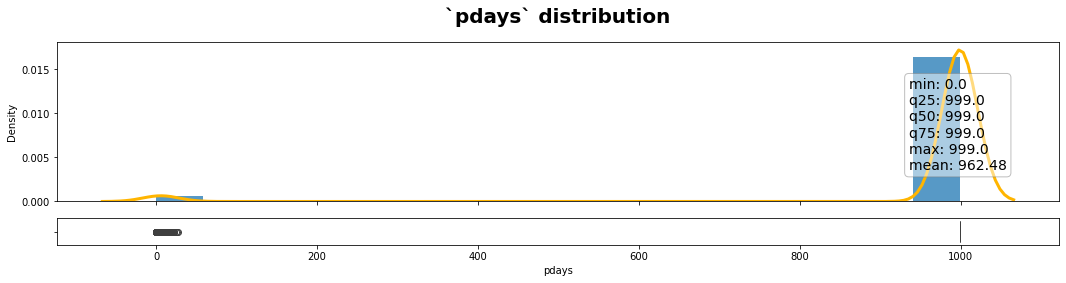

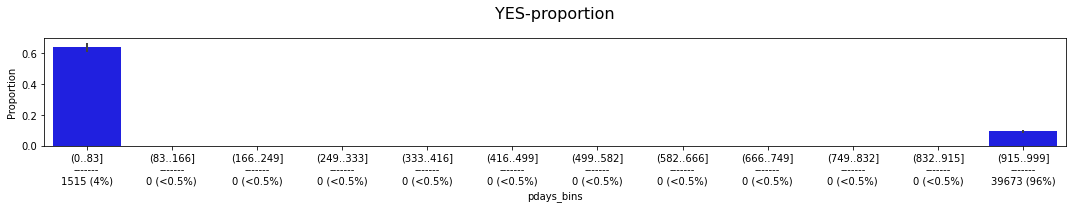

In [22]:
analyse_feature(df_=bank, feature_name='pdays', feature_type='numeric', num_gr=12)

Let's replace 999 with -1 and repeat the analysis:

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


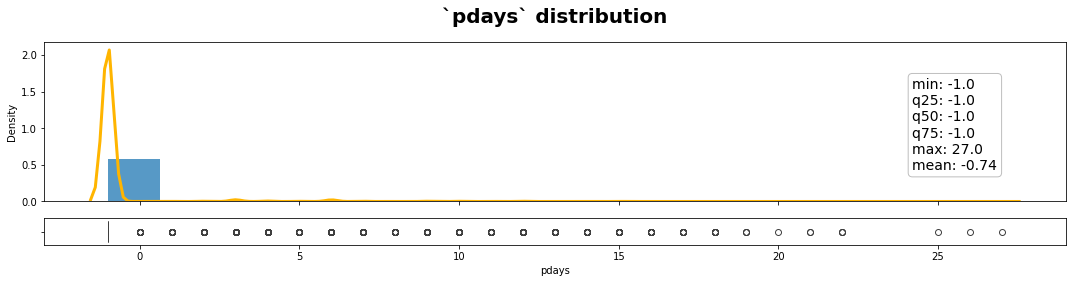

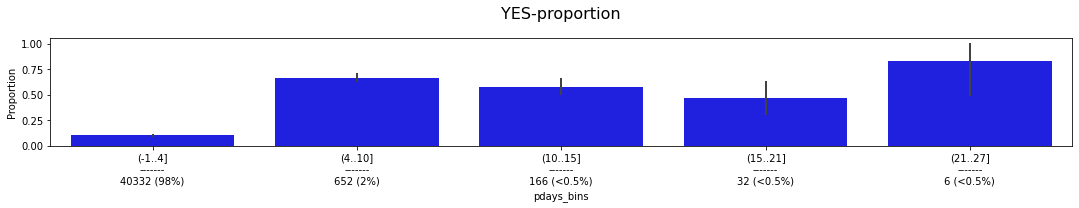

In [23]:
bank['pdays'] = bank['pdays'].replace({999: -1})
analyse_feature(bank, 'pdays', 'numeric', num_gr=5)

/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


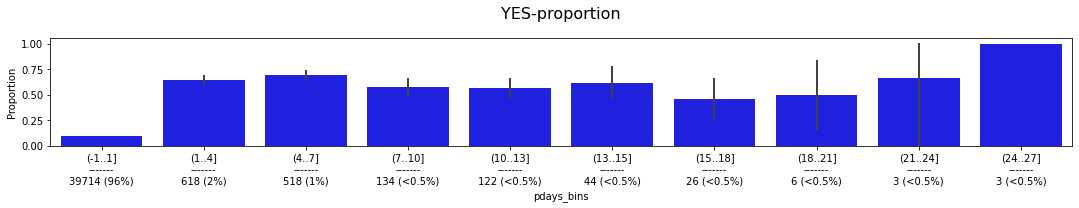

In [24]:
plot_yes_proportion(df_=bank, feature_name='pdays', feature_type='numeric')

In [25]:
feature_name = 'pdays'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (pdays vs y): 0.2790


There is a weak correlation between pdays and y
Conclusion:

Around 96% were not contacted from the last campaign.
The chances to get YES are pretty high within the first 2 weeks (up to 14-15 days); further we have high variance and small data.
People, who was not being previously contacted, have the lowest probability to say YES (0.09).

# Feature: previous (numeric)
previous: number of contacts performed before this campaign and for this client (numeric)


The number of groups CANNOT be more than number of unique values (8).
It will be automatically reduced to that number.


/var/folders/3h/kqjgsj7n6px6rq8gkzsz06r80000gn/T/ipykernel_1022/450176269.py:470: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_lbls)


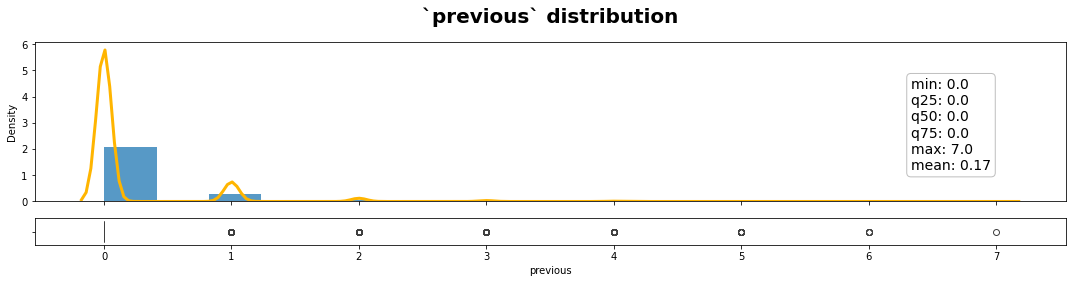

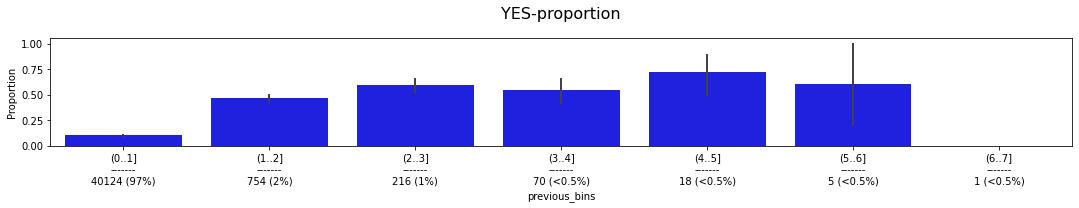

In [26]:
analyse_feature(df_=bank, feature_name='previous', feature_type='numeric', num_gr=10)

In [27]:
feature_name = 'previous'
print(f'Pearson corr. coef. ({feature_name} vs y): {bank[feature_name].corr(bank["y"]):.4f}')

Pearson corr. coef. (previous vs y): 0.2302


There is a weak correlation between previous and y.


previous

Conclusion:

Around 86% were not contacted before this campaign.
It seems like making contacts before a campaign is much better than do not do them at all (for numbers bigger than 3 we have a small number of observations).
Furthermore, we can suppose that more previous contacts mean more chances to get YES, but only to some degree.

# Feature: poutcome (categorical)
poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

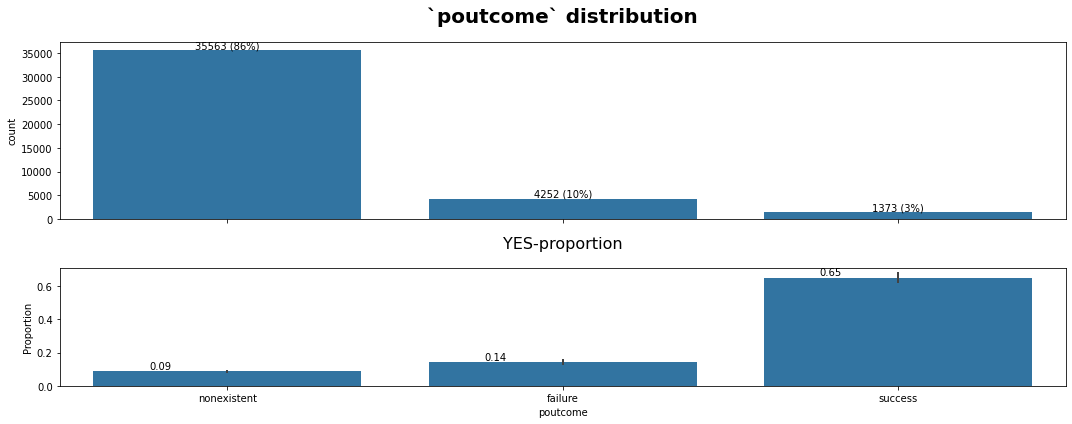

In [28]:
analyse_feature(df_=bank, feature_name='poutcome', feature_type='categorical')

In [29]:
print(f'"Success->success" clients: ~{0.65 * 1373 / bank.shape[0] * 100:.1f}%')
print(f'"Failure->success" clients: ~{0.14 * 4252 / bank.shape[0] * 100:.1f}%')

"Success->success" clients: ~2.2%
"Failure->success" clients: ~1.4%


poutcome

Conclusion:

86% did not participate in the previous marketing campaign, therefore we don't have any previous outcomes for them.
About 2.2% of clients answered YES during both previous and current campaigns.
About 1.4% of clients answered YES for the current campaign, while having NO with a previous one.
If we have a positive answer with a previous campaign, then we more likely to get YES answer during the current one.
If we have a negative answer with a previous campaign, then we less likely to get YES answer, and it is even lower probability for those whose results are non-existent.

# Social and economic context attributes

First, let's see how these features are connected with each other:


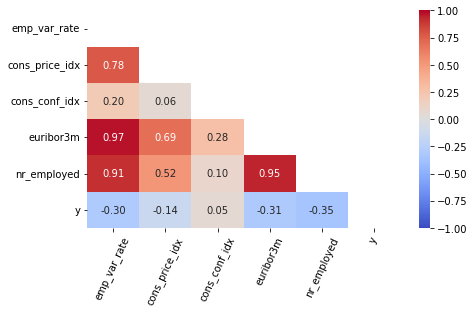

In [30]:
soc_econ_corr = bank[['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 
                'euribor3m', 'nr_employed', 'y']].corr()
mask = np.zeros_like(soc_econ_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(soc_econ_corr, vmin=-1, vmax=1, mask=mask, 
            annot=True, fmt='.2f', cmap=sns.color_palette('coolwarm', as_cmap=True), ax=ax);

ax.set_xticklabels(ax.get_xticklabels(), rotation=65);

Strong correlation:

    emp.var.rate and euribor3m (0.97)

    nr.employed and euribor3m (0.95)

    emp.var.rate and nr.employed (0.91)

    emp.var.rate and cons.price.idx (0.78)


Pretty high correlation:

    cons.price.idx and euribor3m (0.69)

    cons.price.idx and nr.employed (0.52)


# Feature: emp.var.rate (numeric)

emp.var.rate: employment variation rate - quarterly indicator (numeric)

Just for getting a general view of how emp.var.rate looks throughout all three years of observations:

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')


ValueError: Could not interpret value `year` for `hue`. An entry with this name does not appear in `data`.

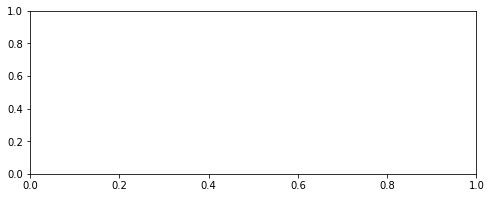

In [32]:
print(bank.columns)
feature_name = 'emp_var_rate'

fig, ax = plt.subplots(figsize=(8, 3))
sns.lineplot(data=bank, x=bank.index, y=feature_name, hue='year', palette='tab10', ax=ax)

ax.set_title(f'{feature_name} by year', fontsize=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1), loc='upper right');
